# **Описание задачи**:

---
#### Решается задача классификации с двумя классами - определение наличия диабета по медицинским и демографическим данным пациентов.
#### 0 - отсутствие диабета,
#### 1 - наличие диабета.

### **В данных содержатся следующая информация о пациентах (признаки):**


1.   Пол

2.   Возраст - является важным фактором, поскольку диабет чаще диагностируется у пожилых людей. Возраст в нашем наборе данных колеблется от 0 до 80 лет.

3.   Наличие гипертонии - это заболевание, при котором кровяное давление в артериях постоянно повышено. 0 означает отсутствие гипертонии, а значение 1 означает, что у пациента есть гипертония.

4.   Наличие сердечных заболеваний - это еще одно заболевание, которое связано с повышенным риском развития диабета. 0 означает, что у пациента нет сердечных заболеваний, а 1 означает, что у него есть сердечные заболевания.

5.   История курения пациента - также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. В имеющемся наборе данных есть 6 категорий:
###### - нет информации,
###### - никогда не курил,
###### - текущий курильщик,
###### - имел привычку курить, но сейчас отказался от нее,
###### - имеет опыт курения (не даёт информации, является ли пациент текущим курильщиком или нет),
###### - не курит в настоящее время (может означать, что пациент ранее курил, но сейчас отказался от этой привычки, либо никогда не курил вообще).

6.   Индекс массы тела (ИМТ) - это показатель жировых отложений, основанный на весе и росте. Более высокие значения ИМТ связаны с более высоким риском развития диабета. Диапазон в наборе данных составляет от 10,16 до 95.69.
##### ИМТ менее 18,5 означает недостаточный вес,
##### 18,5-24,9 - нормальный,
##### 25-29,9 - избыточный вес,
##### а 30 и более - ожирение.

7.   Гликозилированный гемоглобин (HbA1c) - средний уровень сахара в крови за последние 2-3 месяца (≈ за время жизни эритроцитов). Данный показатель не подвержен влиянию случайных факторов (еда, стресс, физическая нагрузка и т.д.), следовательно вариабельность показателя значительно ниже. Более высокие уровни указывают на больший риск развития диабета. В основном значения HbA1c выше 6,5%  указывает на диабет.

8.   Уровень глюкозы в крови - относится к количеству глюкозы в крови в данный момент времени. Высокий уровень глюкозы в крови является ключевым показателем диабета.

Целевая переменная - наличие диабета.

## 1. С задачей ознакомились, перейдем к загрузке данных из репозитория


In [ ]:
# Подключение необходимых библиотек для работы
import pandas as pd  # Работа с dataFrame
import matplotlib.pyplot as plt  # Визуализация данных
import numpy as np  # Для работы с массивами и матрицами
import seaborn as sns  # Для построение матрицы корреляции + боксплоты

from sklearn.model_selection import train_test_split  # Для разбиения выборки на обучающую и тестовую
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder  # Стандартизация и кодировка категориальных данных
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer  # Для объединения pipelinов для числовых и категориальных признаков в один

from sklearn.neighbors import KNeighborsClassifier  # Классификатор ближайших соседей
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix  # Метрики для задачи классификации

# import warnings
# warnings.filterwarnings("ignore")

In [ ]:
url = 'https://raw.githubusercontent.com/Rethinking-1/ML_UNN_Denisov/main/diabetes_prediction_dataset.csv'
df = pd.read_csv(url)

df_size, feach_size = df.shape
df_size, feach_size
print(f'Количество данных: {df_size},\nКоличество признаков в датасете: {feach_size}')
print(f'Количество пропущенных значений в данных: {df.isna().sum().sum()}')

Количество данных: 100000,
Количество признаков в датасете: 9
Количество пропущенных значений в данных: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
print(f'Количество числовых признаков: {len(np.where(df.dtypes != "object")[0])}')
print(f'Количество категориальных признаков: {len(np.where(df.dtypes == "object")[0])}')

num_features = ['Возраст', 'Индекс массы тела', 'Уровень HbA1c', 'Уровень глюкозы в крови', 'Гипертония', 'Сердечные заболевания']  # Один признак - целевая переменная
cat_features = ['Пол', 'История курения']

Количество числовых признаков: 7
Количество категориальных признаков: 2


Так как данные в исходном виде имеют английский язык, переименуем их для удобства на русский

In [ ]:
# Переименование признаков
df['Пол'] = df['gender']  # 1
df['Возраст'] = df['age']  # 2
df['Гипертония'] = df['hypertension']  # 3
df['Сердечные заболевания'] = df['heart_disease']  # 4
df['История курения'] = df['smoking_history']  # 5
df['Индекс массы тела'] = df['bmi']  # 6
df['Уровень HbA1c'] = df['HbA1c_level']  # 7
df['Уровень глюкозы в крови'] = df['blood_glucose_level']  # 8

df['Наличие диабета'] = df['diabetes']  # Целевая переменная

df.drop(labels = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'], axis = 1, inplace = True)  # Удаление признаков с английским описанием

# Переименование уникальных значений в признаках
# Признак пол
df.loc[(df['Пол'] == 'Female'), 'Пол'] = 'Женский'
df.loc[(df['Пол'] == 'Male'), 'Пол'] = 'Мужской'
df.loc[(df['Пол'] == 'Other'), 'Пол'] = 'Другой'
# Признак история курения
df.loc[(df['История курения'] == 'never'), 'История курения'] = 'Никогда не курил'
df.loc[(df['История курения'] == 'No Info'), 'История курения'] = 'Неизвестно'
df.loc[(df['История курения'] == 'current'), 'История курения'] = 'Текущий курильщик'
df.loc[(df['История курения'] == 'former'), 'История курения'] = 'Бывший курильщик'
df.loc[(df['История курения'] == 'ever'), 'История курения'] = 'Имел опыт курения'
df.loc[(df['История курения'] == 'not current'), 'История курения'] = 'Не курит в настоящее время'

Посмотрим информацию о первых 30 пациентах

In [ ]:
df.head(30)

,Пол,Возраст,Гипертония,Сердечные заболевания,История курения,Индекс массы тела,Уровень HbA1c,Уровень глюкозы в крови,Наличие диабета
0,Женский,80.0,0,1,Никогда не курил,25.19,6.6,140,0
1,Женский,54.0,0,0,Неизвестно,27.32,6.6,80,0
2,Мужской,28.0,0,0,Никогда не курил,27.32,5.7,158,0
3,Женский,36.0,0,0,Текущий курильщик,23.45,5.0,155,0
4,Мужской,76.0,1,1,Текущий курильщик,20.14,4.8,155,0
5,Женский,20.0,0,0,Никогда не курил,27.32,6.6,85,0
6,Женский,44.0,0,0,Никогда не курил,19.31,6.5,200,1
7,Женский,79.0,0,0,Неизвестно,23.86,5.7,85,0
8,Мужской,42.0,0,0,Никогда не курил,33.64,4.8,145,0
9,Женский,32.0,0,0,Никогда не курил,27.32,5.0,100,0


## 2. Вычислим **основные характеристики** для числовых признаков:
*   Квартили 0.25, 0.5, 0.75:
###### первый квартиль - отделяет первые 25% значений в вариационном ряду,
###### второй квартиль - первые 50% значений в вариационном ряду (он же ***медиана***),
###### третий квартиль – первые 75% значений.
*   Среднее значение в признаке
*   Дисперсия - это мера *разброса* данных относительно их среднего значения. Чем больше разброс, тем более различны значения в выборке.
*   Стандартное отклонение - квадратный корень из дисперсии. Оно имеет ту же единицу измерения, что и исходные данные, в то время как дисперсия имеет квадратную единицу измерения. Это делает стандартное отклонение более интерпретируемым и понятным.
*   Размах - разность между минимальным и максимальным значениями выборки. Характеризует величину изменчивости данных в выборке и показывает, насколько данные распределены по всему диапазону значений.
*   Минимальное и максимальное значения в признаках.


In [ ]:
def my_describe_(df, feature):
    """Для удобного вывода статистик"""
    """На вход принимает dataFrame и признак, по которому нужно вычислить статистики"""
    """Возвращает посчитанные статистики в виде списка"""
    describe = df[feature].describe()
    variance = round(np.var(df[feature]), 2)
    return [describe.name,  # Название признака
            variance, round(describe["std"], 2), round(describe["max"] - describe["min"], 2),  # Дисперсия(разброс), стандартное отклонение, размах выборки
            round(describe["min"], 2), round(describe["25%"], 2),  # Минимальное значение, квартиль 0.25
            round(describe["mean"], 2), round(describe["50%"], 2),  # Среднее значение, квартиль 0.5(медиана)
            round(describe["75%"], 2), round(describe["max"], 2)]  # Квартиль 0.75, максимальное значение


*   Большой размах выборки по признаку возраст указывает на широкий возрастной диапазон пациентов,
*   Большой размах по уровню глюкозы в крови указывает на значительные различия в значениях этого показателя.
*   В среднем гипертония наблюдается чаще, чем сердечные заболевания, но реже, чем диабет.
*   Половина пациентов страдает ожирением, либо имеет избыточный вес.
*   Большинство пациентов из данной выборки не болеют диабетом.

In [ ]:
my_describe = pd.DataFrame(
    {'Признак': [],
     'Разброс': [], 'Стандартное отклонение': [], 'Размах': [],
     'Минимальное значение': [], 'Квартиль 25%':[],
     'Среднее значение': [], 'Медиана':[],
     'Квартиль 75%':[], 'Максимальное значение':[]})

for num_f in num_features:
  my_describe.loc[len(my_describe.index)] = my_describe_(df, num_f)
my_describe.loc[len(my_describe.index)] = my_describe_(df, 'Наличие диабета')

my_describe

,Признак,Разброс,Стандартное отклонение,Размах,Минимальное значение,Квартиль 25%,Среднее значение,Медиана,Квартиль 75%,Максимальное значение
0,Возраст,507.00,22.52,79.92,0.08,24.00,41.89,43.00,60.00,80.00
1,Индекс массы тела,44.05,6.64,85.68,10.01,23.63,27.32,27.32,29.58,95.69
2,Уровень HbA1c,1.15,1.07,5.50,3.50,4.80,5.53,5.80,6.20,9.00
3,Уровень глюкозы в крови,1657.14,40.71,220.00,80.00,100.00,138.06,140.00,159.00,300.00
4,Гипертония,0.07,0.26,1.00,0.00,0.00,0.07,0.00,0.00,1.00
5,Сердечные заболевания,0.04,0.19,1.00,0.00,0.00,0.04,0.00,0.00,1.00
6,Наличие диабета,0.08,0.28,1.00,0.00,0.00,0.08,0.00,0.00,1.00


Всего 20% пациентов, являющихся бывшими курильщиками имеют возраст ниже среднего возраста всей выборки.

In [ ]:
former = df.loc[df["История курения"] == "Бывший курильщик"]["Возраст"]
current = df.loc[df["История курения"] == "Текущий курильщик"]["Возраст"]

former.quantile(0.20)

42.0

*   Средний возраст пациентов, куривших в прошлом, не курящих на текущее время составляет 57 лет, это близко к тому возрасту, в котором начинает резко возрастать число заболеваний диабетом. (см.график"Зависимость количества пациентов c диабетом (в %) от возраста" далее).
*   Средний возраст пациентов, являющихся текущими курильщиками составляет 44 года, что на 13 лет ниже, чем средний возраст куривших в прошлом.

In [ ]:
int(former.mean()), int(current.mean())

(57, 44)

*История курения*


*   Меньше всего болеют диабетом пациенты, о которых нет информации про историю курения. Скорее всего это связано с тем, что пациенты, которые вероятнее не болеют диабетом, чаще не оставляют информации об их истории курения.
*   Пациенты, ранее имеющие привычку курить, но сейчас отказавшиеся от нее чаще всего страдают диабетом. Это связано с тем, что это, в основном, пациенты в возрасте, превышающий средний возраст во всей выборке, как известно, с возрастом увеличивается риск заболевания диабетом.
*   Следующая группа людей, подверженная заболеванию диабетом - пациенты, имеющие опыт курения (не исключено, что являются курильщиками в настоящее время).
*   Далее идут похожие по смыслу группы: никогда не курил, не курит в настоящее время. В значение не курит в настоящее время вложена информация, что пациент может быть бывшым курильщиком или вовсе не иметь опыта курения. Пациенты, ответившие "не курю в настоящее время" незначительно чаще болеют диабетом, чем те, кто ответил "никогда не курил".
*   Доля текущих курильщиков, болеющих диабетом, равна доле никогда не куривших, болеющих диабетом пациентов. Возможно, это связано с тем, что    меньше всего болеют диабетом пациенты, о которых нет информации про историю курения. Это пациенты, которые вероятнее не болеют диабетом. А те пациенты, которые подозревают или уже знают, что у них диабет, оставляли когда-либо информацию об их истории курения. Если данное предположение верно, то текущие курильщики чаще болеют диабетом, чем никогда не курившие пациенты. Тогда из этого следует, что курение увеличивает риски заболеть диабетом.  

In [ ]:
cross_smoking = pd.crosstab(df['История курения'], df['Наличие диабета']).sort_values(by = 1, ascending = False)
cross_smoking['Доля болеющих диабетом'] = round(cross_smoking[1] / (cross_smoking[0] + cross_smoking[1]), 2)
cross_smoking['Количество пациентов'] = cross_smoking[0] + cross_smoking[1]
cross_smoking.sort_values(by = 'Доля болеющих диабетом', ascending = False)

Наличие диабета,0,1,Доля болеющих диабетом,Количество пациентов
История курения,,,,
Бывший курильщик,7762,1590,0.17,9352
Имел опыт курения,3532,472,0.12,4004
Не курит в настоящее время,5757,690,0.11,6447
Никогда не курил,31749,3346,0.10,35095
Текущий курильщик,8338,948,0.10,9286
Неизвестно,34362,1454,0.04,35816


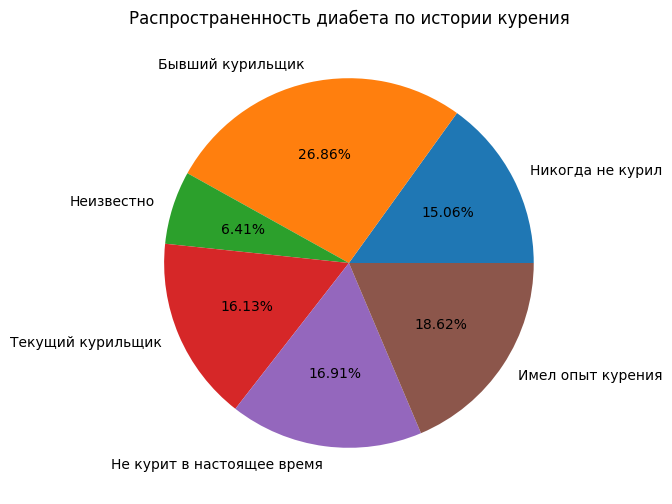

In [ ]:
fig = plt.figure(figsize = (6, 6))
smoking_per = (cross_smoking[1] / (cross_smoking[0] + cross_smoking[1]) * 100)
labels = list(cross_smoking.index)

plt.pie(smoking_per, labels=labels, autopct='%.2f%%')
plt.title('Распространенность диабета по истории курения');

*Возраст*
*    В данной выборке средний возраст составляет ~42 года. В выборке имеются пациенты с возрастом менее года. Самый большой возраст 80 лет.
*    До 20 лет диабет наблюдается у <2% пациентов.
*    С 20 до 50 лет количество пациентов с диабетом возрастает до 10%
*    В период с 50 до 65 лет, количество заболевших увеличивается до 20%.
*    В возрасте 75 лет наблюдается по количеству пациентов, болеющих диабетом (~24%).
*    Далее, в силу возраста, количество пациентов, болеющих диабетом снижается, по отношению к здоровым пациентам.

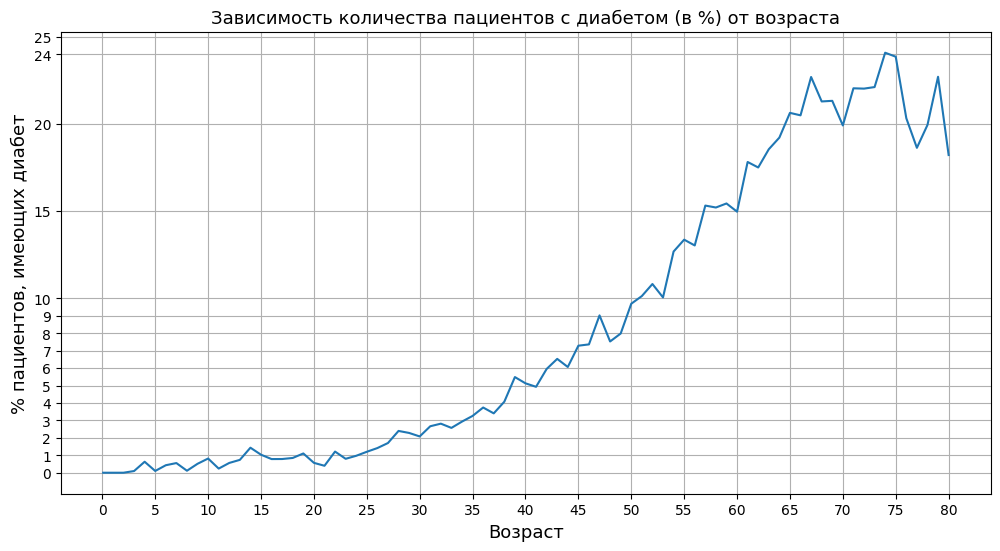

In [ ]:
fig = plt.figure(figsize = (12, 6))
cross_t = pd.crosstab(df['Возраст'], df['Наличие диабета'])
x_age = cross_t.index  # Возраст пациентов
no_diabetes, presence_of_diabetes = cross_t[0], cross_t[1]  # Количество пациентов по возрасту без диабета и с диабетом соответственно
y = presence_of_diabetes / (presence_of_diabetes + no_diabetes) * 100  # % пациентов с диабетом взависимости от возраста

plt.plot(x_age, y)
plt.xlabel('Возраст', size = 13), plt.ylabel('% пациентов, имеющих диабет', size = 13)
plt.title('Зависимость количества пациентов c диабетом (в %) от возраста', size = 13), plt.grid()
plt.xticks(np.linspace(0, 80, 17)), plt.yticks([0] + list(range(1,11)) + [20, 15, 24, 25]);

*Пол*
- Данный признак является некритично несбалансированным, в данной выборке мужчины чаще болеют диабетом, чем женщины.

Признак ***наличие диабета*** является сильно несбалансированным (~90% пациентов не болеют диабетом, ~10% болеют).

Наличие диабета,0,1
Пол,,
Другой,18,0
Женский,54091,4461
Мужской,37391,4039


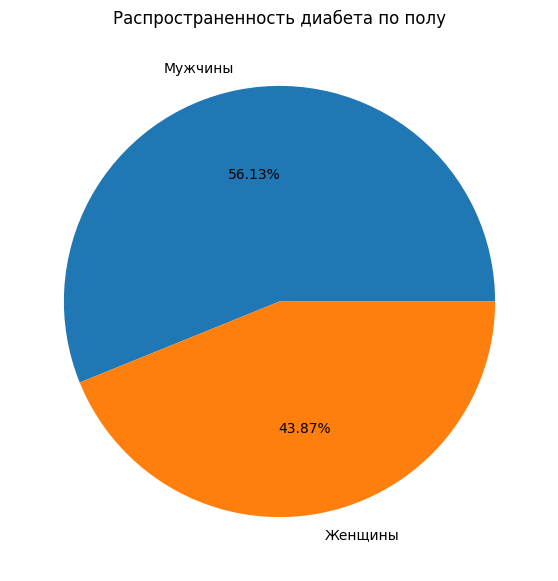

In [ ]:
cross_gender = pd.crosstab(df['Пол'], df['Наличие диабета'])
display(cross_gender)  # Значение признака пол = "Другой" следует исключить из рассмотрения, т.к. таких данных практически нет и нет ни одного случая заболевания диабетом

male = round(cross_gender[1]['Мужской'] / (cross_gender[0]['Мужской'] + cross_gender[1]['Мужской']) * 100, 2)
female = round(cross_gender[1]['Женский'] / (cross_gender[0]['Женский'] + cross_gender[1]['Женский']) * 100, 2)

fig = plt.figure(figsize = (7, 7))
labels, sizes = ['Мужчины', 'Женщины'], [male, female]
plt.pie(sizes, labels=labels, autopct='%.2f%%')
plt.title('Распространенность диабета по полу');

In [ ]:
# Удаление данных о "другом" поле
other_gender = np.where(df['Пол'] == 'Другой')[0]
df.drop(other_gender, inplace = True)
df.reset_index(drop = True, inplace = True)
df.shape

(99982, 9)

*Гипертония*
* Данный признак является сильно несбалансированным, количество болеющих гипертонией намного меньше, чем пациентов без гипертонии.
* Пациенты, страдающие гипертонией, болеют диабетом в 4 раза чаще, чем пациенты без гипертонии.

Наличие диабета,0,1
Гипертония,,
0,86085,6412
1,5397,2088


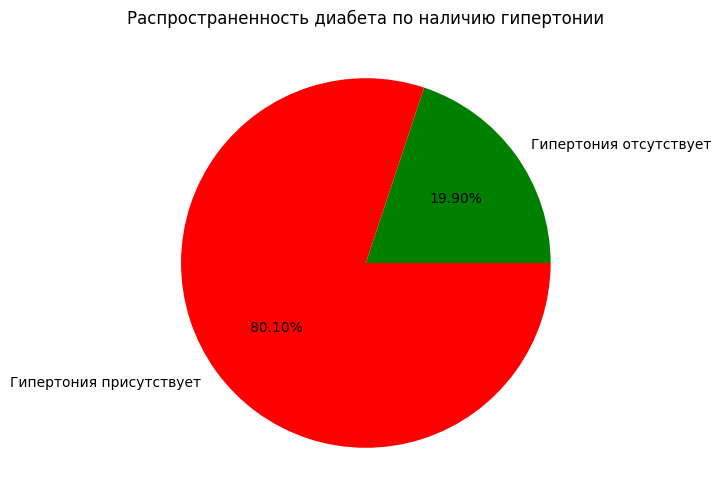

In [ ]:
cross_hypertension = pd.crosstab(df['Гипертония'], df['Наличие диабета'])
display(cross_hypertension)

without_hypertension = cross_hypertension[0][0] + cross_hypertension[1][0]
suffering_from_hypertension = cross_hypertension[0][1] + cross_hypertension[1][1]

diabetes_without_hypertension = round(cross_hypertension[1][0] / without_hypertension * 100, 2)
diabetes_with_hypertension = round(cross_hypertension[1][1] / suffering_from_hypertension * 100, 2)

fig = plt.figure(figsize = (6, 6))
labels, sizes = ['Гипертония отсутствует', 'Гипертония присутствует'], [diabetes_without_hypertension, diabetes_with_hypertension]
plt.pie(sizes, labels=labels, autopct='%.2f%%', colors = ['green', 'red'])
plt.title('Распространенность диабета по наличию гипертонии');

*Сердечные заболевания*
* Ситуация примерно такая же, как с гипертонией, при сердечных заболеваниях риск диабета немного выше, чем при гипертонии.

Наличие диабета,0,1
Сердечные заболевания,,
0,88807,7233
1,2675,1267


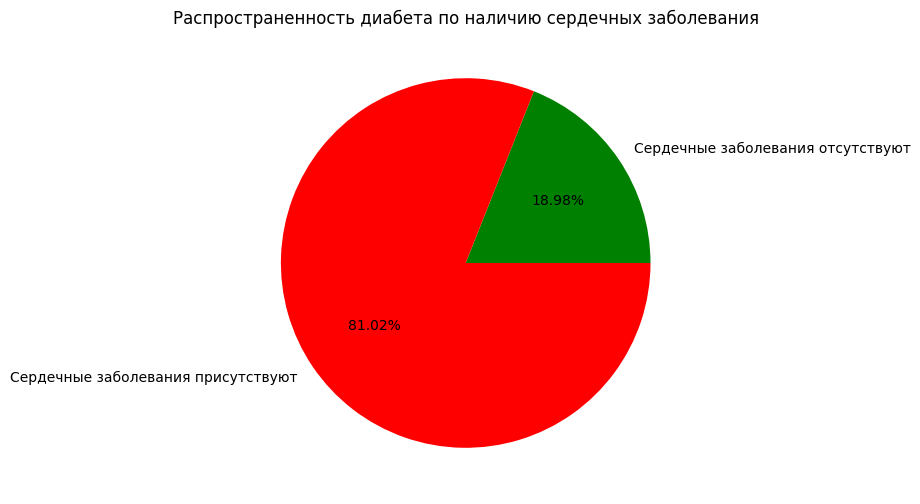

In [ ]:
cross_heart_diseases = pd.crosstab(df['Сердечные заболевания'], df['Наличие диабета'])
display(cross_heart_diseases)

no_heart_disease =  cross_heart_diseases[0][0] + cross_heart_diseases[1][0]
have_heart_disease = cross_heart_diseases[0][1] + cross_heart_diseases[1][1]

diabetes_without_heart_disease = round(cross_heart_diseases[1][0] / no_heart_disease * 100, 2)
diabetes_with_heart_disease = round(cross_heart_diseases[1][1] / have_heart_disease * 100, 2)

fig = plt.figure(figsize = (6, 6))
labels, sizes = ['Сердечные заболевания отсутствуют', 'Сердечные заболевания присутствуют'], [diabetes_without_heart_disease, diabetes_with_heart_disease]
plt.pie(sizes, labels=labels, autopct='%.2f%%', colors = ['green', 'red'])
plt.title('Распространенность диабета по наличию сердечных заболевания');

* У пациентов, страдающих и гипертонией и сердечными заболеваниями значительно увеличивается риск заболевания диабетом.

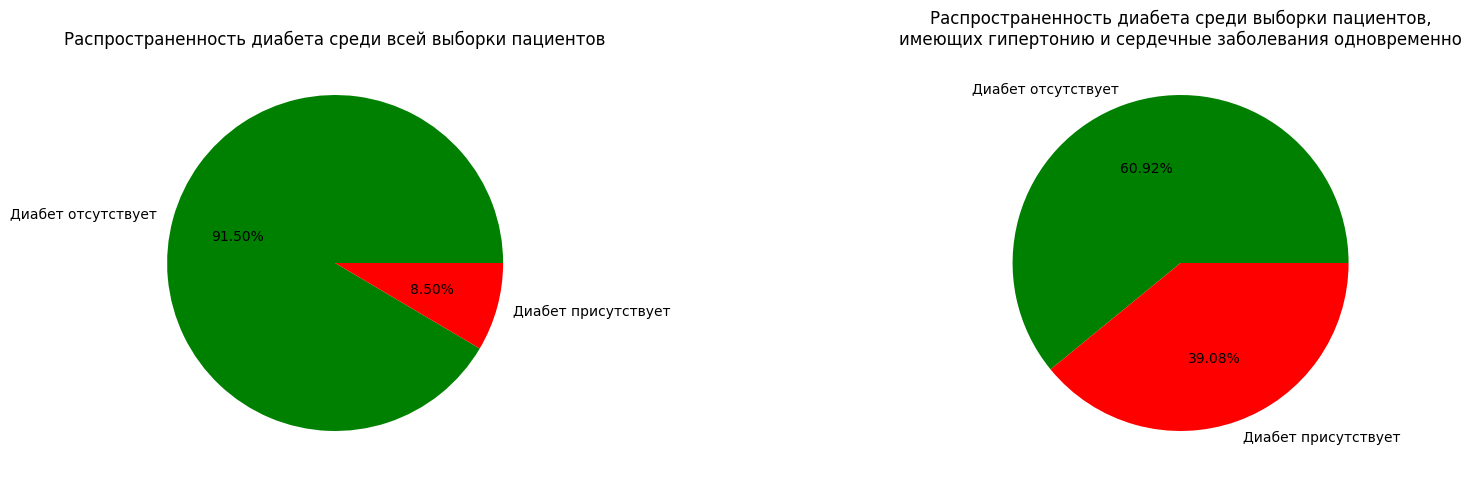

In [ ]:
df_temp = df.loc[(df['Гипертония'] == 1) & (df['Сердечные заболевания'] == 1)].copy(deep = True)

labels = ['Диабет отсутствует', 'Диабет присутствует']
sizes1 = [df['Наличие диабета'].value_counts()[0], df['Наличие диабета'].value_counts()[1]]
sizes2  =[df_temp['Наличие диабета'].value_counts()[0], df_temp['Наличие диабета'].value_counts()[1]]


figure = plt.figure(figsize = (20 ,12))
axes = [0] * 2  # 2 индивидуальных графика
axes[0], axes[1]  = figure.add_subplot(2, 2, 1), figure.add_subplot(2, 2, 2)

axes[0].set(title = 'Распространенность диабета среди всей выборки пациентов')
axes[1].set(title = 'Распространенность диабета среди выборки пациентов,\nимеющих гипертонию и сердечные заболевания одновременно')
axes[0].pie(sizes1, labels=labels, autopct='%.2f%%', colors = ['green', 'red']);

axes[1].pie(sizes2, labels=labels, autopct='%.2f%%', colors = ['green', 'red']);


* Наблюдается явно выраженное увеличение значения характеристик у больных диабетом:
###### В среднем данные пациенты старше, чем пациенты без диабета,
###### Значительно выше риск наличия гипертонии и сердечных заболеваний,
###### Пациенты с диабетом больше подвержены ожирению,
###### Данные пациенты имеют повышенный уровень HbA1c и глюкозы в крови.

In [ ]:
pd.pivot_table(df,index = 'Наличие диабета', values = num_features, aggfunc= 'mean')

,Возраст,Гипертония,Индекс массы тела,Сердечные заболевания,Уровень HbA1c,Уровень глюкозы в крови
Наличие диабета,,,,,,
0,40.117265,0.058995,26.887067,0.029241,5.396759,132.851173
1,60.946588,0.245647,31.988382,0.149059,6.934953,194.094706


* Основная часть пациентов имеет избыточный вес.

In [ ]:
def my_dist_hist_num(dataFrame, sign: str, intervals):
    fig = plt.figure(figsize= (10, 6))
    data = list(dataFrame[sign])
    n = [0] * (len(intervals))  # Количество значений в интервале
    pred = min(dataFrame[sign].min(), 0)
    for i, border in enumerate(intervals):
        n[i] =len([value for value in data if pred < value <= border]) / len(data)
        pred = border

    x = [min(data)] * 2 + [intervals[int(i / 2)] for i in range(2 * len(intervals))]
    y = [0] + [n[int(i / 2)] for i in range(2 * len(n))] + [0]
    for i, value in enumerate(intervals):
        plt.vlines(value, ymin = 0, ymax = n[i], color = 'black')

    plt.plot(x, y, label = 'Гистограмма по выборке', color = 'black')
    plt.fill_between(x, y, color='blue', alpha=0.8)
    plt.xlabel(f'{sign}'), plt.ylabel('Относительная частота'), plt.title(f'Гистограмма относительных частот для признака {sign}')
    labels = [' '] + intervals + [f'{intervals[-1]}+']
    plt.xticks(intervals)
    plt.grid();

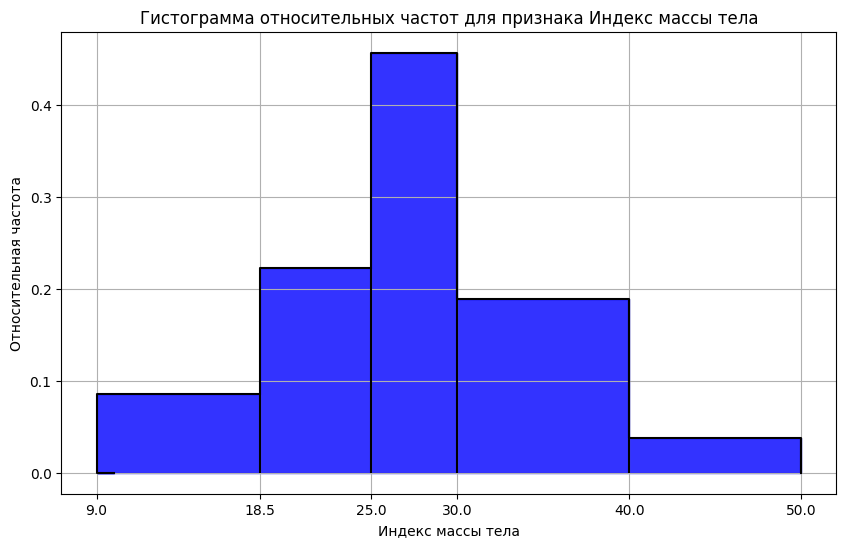

In [ ]:
my_dist_hist_num(df, 'Индекс массы тела', [9, 18.5, 25, 30, 40, 50])

* ~ 15% пациентов имеет HbA1c от 3.5 до 4
* ~ 7.5% имеет HbA1c 4 до 4.5
* ~ 15% имеет HbA1c 4.5 до 5
* Половина пациентов имеет показатели HbA1c от 5.5 до 6.5,
* ~ 10% пациентов имеют HbA1c от 6.5 до 7
* менее 5% пациентов выборки имеют HbA1c > 7

Минимальный показатель HbA1c в выборке: 3.5


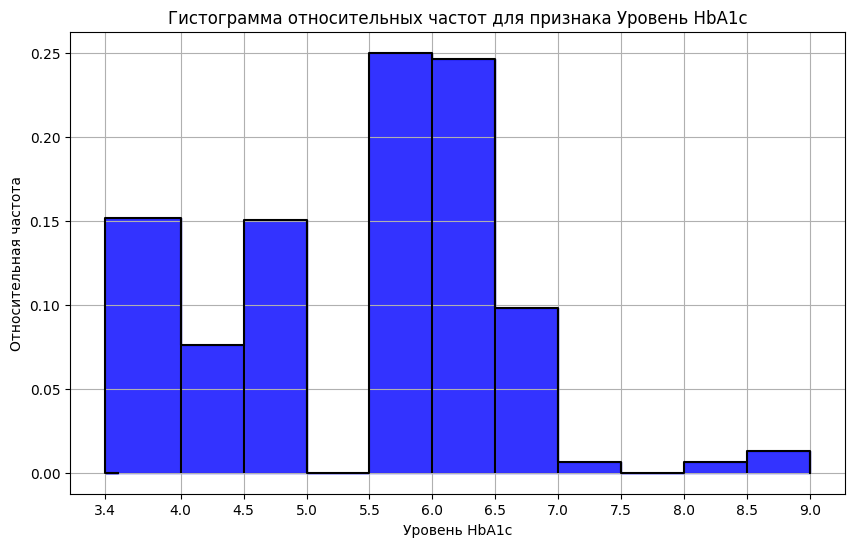

In [ ]:
print(f'Минимальный показатель HbA1c в выборке: {df["Уровень HbA1c"].min()}')
my_dist_hist_num(df, 'Уровень HbA1c', [3.4, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9])

Наибольшее число пациентов имеет уровень глюкозы в крови от 130 до 160

In [ ]:
df['Уровень глюкозы в крови'].min(), df['Уровень глюкозы в крови'].max()

(80, 300)

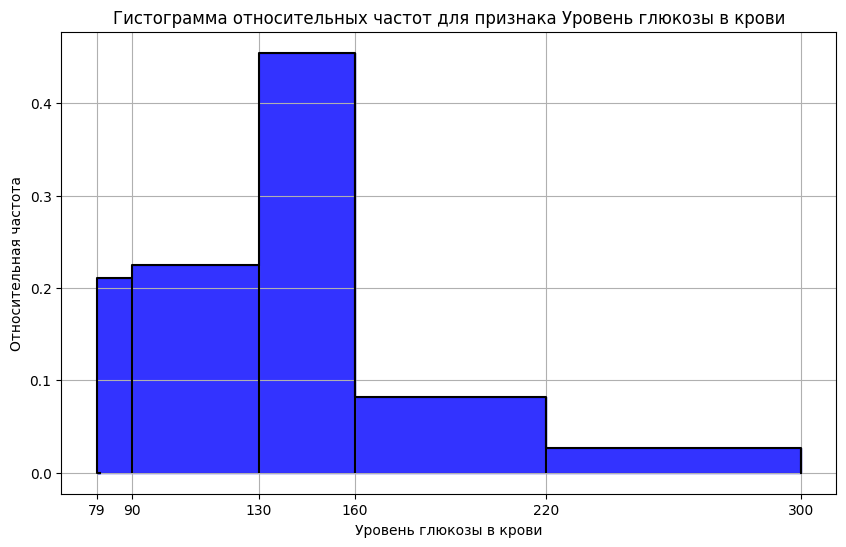

In [ ]:
my_dist_hist_num(df, 'Уровень глюкозы в крови', [79, 90, 130, 160, 220, 300])

## 3. Посмотрим, как коррелируют признаки между друг другом

* Возраст умеренно коррелирует с ИМТ. Так же имеется слабая положительная корреляция возраста с гипертонией и сердечными заболеваниями т.к с возрастом болезней становится больше.
* Наличие диабета имеет слабую и умеренную положительную корреляцию со всеми признаками, т.к. все признаки играют роль в образовании болезни, особенно уровень HbA1c и уровень глюкозы в крови.


**Сильная корреляция между признаками отсутствует.**


Если бы она была, стоило бы удалить коррелирующие признаки, потому что:
1. Они повышают сложность модели.
2. Делают её более склонной к переобучению, т.к. модель запоминает шум в данных вместо обобщения общих закономерностей.
3. Ухудшают интерпретируемость, т.е. затрудняют понимание того, какие признаки действительно важны.

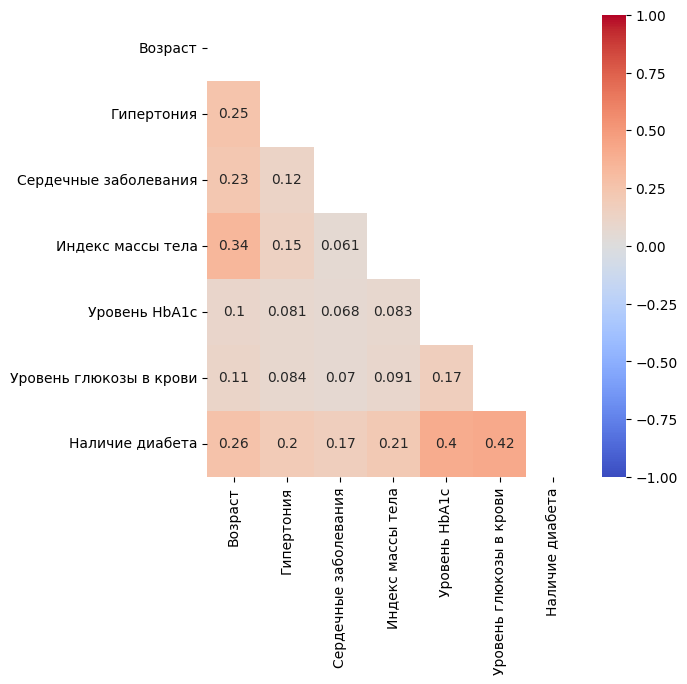

In [ ]:
plt.figure(figsize=(6, 6))
matrix = np.triu(df.corr(numeric_only = True))  # Нижнетреугольная матрица
p=sns.heatmap(df.corr(numeric_only = True),
              annot=True,
              cmap ='coolwarm',
              vmin=-1, vmax=1, center= 0, mask=matrix)

## 4. Обработаем данные от выбросов

In [ ]:
def outlier_removal(series, w=1.5):
    """Удаление выбросов по межквартильному размаху"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    Q3_Q1 = Q3 - Q1
    lower_bound = Q1 - w * Q3_Q1
    upper_bound = Q3 + w * Q3_Q1
    return series.loc[(series > upper_bound) | (series < lower_bound)]

In [ ]:
print('Количество объектов в признаках, не попадающих в полтора межквартильных расстояния:')
for i in num_features:
    print(f'Признак {i} -> {outlier_removal(df[i]).shape[0] / df.shape[0] * 100:.2f}%')

Количество объектов в признаках, не попадающих в полтора межквартильных расстояния:
Признак Возраст -> 0.00%
Признак Индекс массы тела -> 7.09%
Признак Уровень HbA1c -> 1.32%
Признак Уровень глюкозы в крови -> 2.04%
Признак Гипертония -> 7.49%
Признак Сердечные заболевания -> 3.94%


* В признаке возраст отсутствуют выбросы,
* В признаках гипертония, сердечные заболевания, наличие диабета так же отсутствуют выбросы, в силу несбалансированных классов есть значения, выходящие за пределы боксплота,
* Признак средний уровень сахара в крови за последние 3 месяца имеет значения, которые встречаются не очень редко в реальной жизни, поэтому не стоит относить их к выбросам,
* Уровень глюкозы в крови и ИМТ нужно смотреть подробнее.

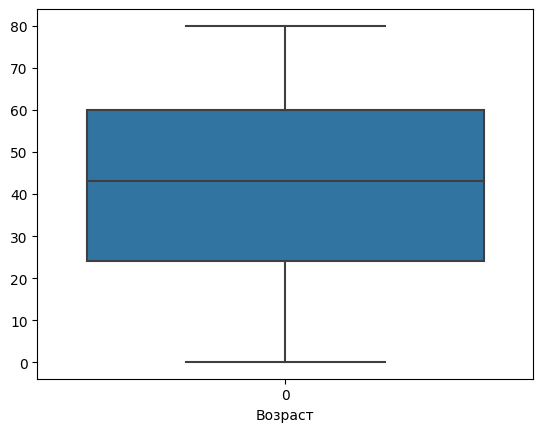

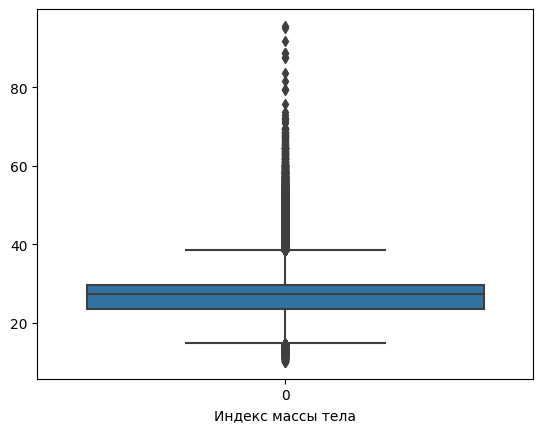

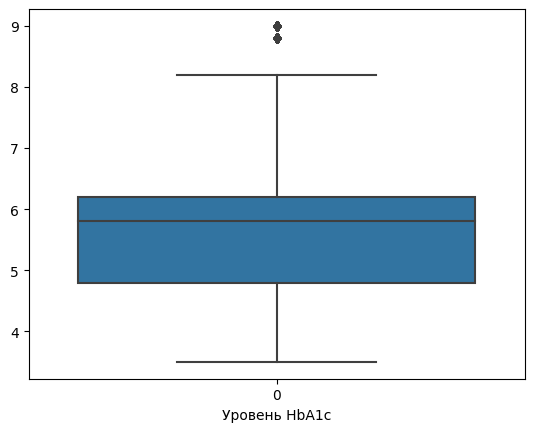

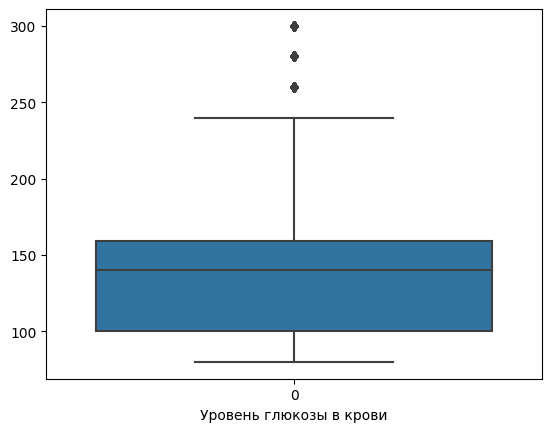

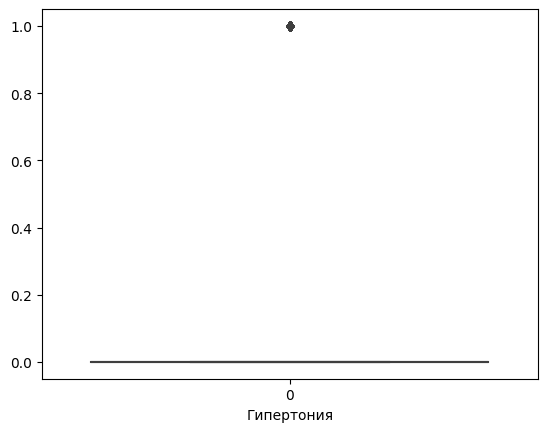

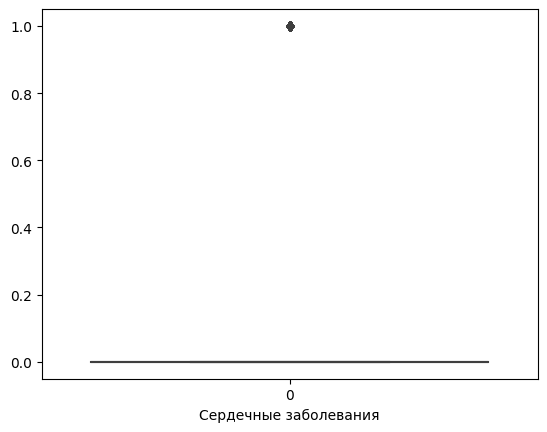

In [ ]:
for i in num_features:
  sns.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

* Имеется 3277 пациентов с уровнем глюкозы в крови > 200, из которых абсолютно каждый имеет диабет, но удалять из выборки данные объекты не стоит, так как они несут важную информацию о том, что при значении данного признака > 200 у пациента имеется диабет.

In [ ]:
anomal_obj = df.loc[df['Уровень глюкозы в крови'] > 200]
print(anomal_obj['Наличие диабета'].unique())
print(anomal_obj.shape[0])

[1]
3277


* Исключим из выборки пациентов с ИМТ > 40, так как они попадают под описание выбросов (по боксплоту)

In [ ]:
max_imt = 40
anomal_obj_ind = np.where(df['Индекс массы тела'] > max_imt)[0]
anomal_obj = df.iloc[anomal_obj_ind]
print(anomal_obj['Наличие диабета'].unique())
print(anomal_obj.shape[0])

[0 1]
4593


In [ ]:
print(f'Пациенты с ИМТ > {max_imt}. Количество пациентов с гипертониней ')
pd.pivot_table(anomal_obj, index = 'Наличие диабета', columns = 'Гипертония', values = 'Пол', aggfunc= 'count')

Пациенты с ИМТ > 40. Количество пациентов с гипертониней 


Гипертония,0,1
Наличие диабета,,
0,2988,417
1,862,326


In [ ]:
df.drop(anomal_obj_ind, inplace = True)
df.reset_index(drop = True, inplace = True)
print(f'Текущее количество данных: {df.shape[0]}')

Текущее количество данных: 95389


Исключим из выборки пациентов, у которых указан возраст < 5 лет и история курения "текущий курильщик", так как это аномальные ситуации, создающие шум в данных.

In [ ]:
index_ = df.loc[(df['Возраст'] < 5) & (df['История курения'] == 'Текущий курильщик')].index
df.drop(index_, inplace = True)
df.reset_index(drop = True, inplace = True)
print(f'Текущее количество данных: {df.shape[0]}')

Текущее количество данных: 95374


## 5. Проведём конечную обработку данных:
* Обработаем категориальные признаки с помощью onehot кодирования.

One hot encoding - это метод представления категориальных данных в виде бинарных векторов. Каждая категория представляется отдельным бинарным признаком, где 1 указывает на принадлежность к данной категории, а 0 - на отсутствие принадлежности. Этот метод позволяет использовать категориальные данные в алгоритмах машинного обучения, которые требуют числовых значений.
* Проведем нормализацию данные с помощью minmaxscaller: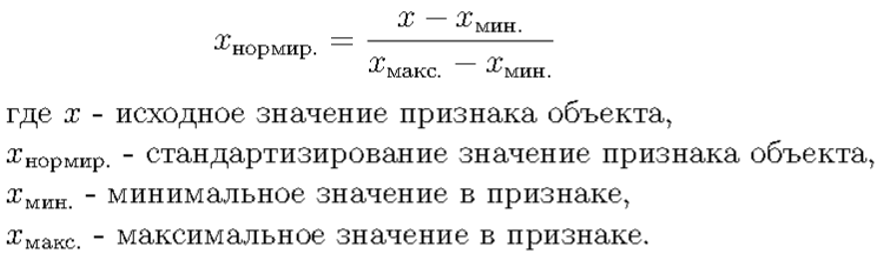
Нормализация нужна в случае, если алгоритм машинного обучения является метрическим (метод ближайших соседей или k nearest neighbors). Если это не так (модель случайного леса или RandomForest), данные стандартизировать не обязательно.

In [ ]:
# Создадим pipeline для эффективной обработки числовых и категориальных признаков
minmaxscaler = MinMaxScaler()
pipe_num = Pipeline([('scaler', minmaxscaler)])

onehotencoder = OneHotEncoder(handle_unknown='ignore')
pipe_cat = Pipeline([('encoder', onehotencoder)])

col_transformer = ColumnTransformer([('num_preproc', pipe_num, [x for x in num_features]),
                                     ('cat_preproc', pipe_cat, [x for x in cat_features])])

col_transformer

ColumnTransformer(transformers=[('num_preproc',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Возраст', 'Индекс массы тела',
                                  'Уровень HbA1c', 'Уровень глюкозы в крови',
                                  'Гипертония', 'Сердечные заболевания']),
                                ('cat_preproc',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Пол', 'История курения'])])

## 6. Разделим данные на обучающую и тестовую выборки в соотношении 3:1, обучим созданный pipeline на обучающей выборке и применим его к тестовой, далее будем использовать эти данные в создании моделей машинного обучения.

In [ ]:
X = df.drop('Наличие диабета', axis = 1)
target = df['Наличие диабета']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, train_size=0.75, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

print(f'Размер обучающей выборки: {X_train.shape[0]}\nРазмер тестовой выборки: {X_test.shape[0]}')

transform_train = col_transformer.fit_transform(X_train)
transform_test = col_transformer.transform(X_test)

transform_X_train = pd.DataFrame(transform_train, columns = [x.split('__')[-1] for x in col_transformer.get_feature_names_out()])
transform_X_test = pd.DataFrame(transform_test, columns = [x.split('__')[-1] for x in col_transformer.get_feature_names_out()])
print(f'\nОбъект обучающей выборки до преобразования')
display(X_train.head(1))
print(f'\nОбъект обучающей выборки после преобразования')
display(transform_X_train.head(1))

(71530, 8) (23844, 8) (71530,) (23844,)
Размер обучающей выборки: 71530
Размер тестовой выборки: 23844

Объект обучающей выборки до преобразования


,Пол,Возраст,Гипертония,Сердечные заболевания,История курения,Индекс массы тела,Уровень HbA1c,Уровень глюкозы в крови
0,Мужской,13.0,0,0,Никогда не курил,17.2,3.5,158



Объект обучающей выборки после преобразования


,Возраст,Индекс массы тела,Уровень HbA1c,Уровень глюкозы в крови,Гипертония,Сердечные заболевания,Пол_Женский,Пол_Мужской,История курения_Бывший курильщик,История курения_Имел опыт курения,История курения_Не курит в настоящее время,История курения_Неизвестно,История курения_Никогда не курил,История курения_Текущий курильщик
0,0.161662,0.239747,0.0,0.354545,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## 7. Запустим классификатор ближайших соседей (K Neighbors Neighbors он же KNN)

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')  # Модель KNN с параметрами по умолчанию (5 соседей, Евклидова метрика расстояния)
model_KNN.fit(transform_X_train, y_train)

pred_test = model_KNN.predict(transform_X_test)  # Предсказание базовой модели KNN на обучающей и тестовой выборках
pred_train = model_KNN.predict(transform_X_train)

* Посчитаем ошибки модели KNN на обучающей и тестовой выборках

In [ ]:
def score(actual, pred, info = True):
    cm_train = confusion_matrix(actual, pred)  # Матрица рассогласования

    TP = cm_train[0][0]  # Количество верно предсказанных положительных результатов
    TN = cm_train[1][1]  # Количество верно предсказанных отрицательных результатов
    FP = cm_train[0][1]  # Ошибки 1 рода (ложные тревоги)(количество ложноположительных результатов)
    FN = cm_train[1][0]  # Ошибки 2 рода (промахи)(количество ложноотрицательных результатов)
    print('\tМатрица рассогласования(confusion_matrix)')
    print('Пациент болен\t|\tПациент здоров\
        \n_______________________________________')
    print(f'TP = {TP}\t|\tFP = {FP}\t|Тест положителен\
                      \n\t\t|\t(ложные тревоги)\
        \n_______________________________________\
          \nFN = {FN}\t|\tTN = {TN}\t|Тест отрицателен\
    \n(промахи)\n')  # // Надо было через dataFrame, но уже выбран путь hard worker

    # 1.
    TNR = TN / (TN + FP)  # Доля верно предсказанных отрицательных результатов среди всех фактически отрицательных случаев {Specificity(специфичность)} |-> True negative Rate
    NPV = TN / (TN + FN)  # Доля верно предсказанных отрицательных результатов среди всех предсказанных отрицательных результатов)                      |-> Negative predictive value

    # 2.
    FPR = FP / (TN + FP)  # Доля ложноположительных прогнозов(ошибок 1 рода(Fall out)) среди всех фактически отрицательных случаев                      |-> False positive rate
    FDR = FP / (TP + FP)  # Доля ложноположительных прогнозов(ошибок 1 рода(Fall out)) среди всех предсказанных положительных результатов               |-> False discovery rate

    # 3.
    FNR = FN / (TP + FN)  # Доля ложноотрицательных прогнозов(ошибок 2 рода) среди всех фактически положительных результатов                            |-> False negative rate
    FMR = FN / (TN + FN)  # Доля ложноотрицательных прогнозов(ошибок 2 рода) среди всех предсказанных отрицательных результатов                         |-> False miss Rate?

    # 4.
    # Sensitivity(чувствительность), hit rate, recall, or true positive rate
    # Pr(predicted class = 1| real class = 1)
    # (отклик, полнота) (Доля истинно положительных результатов среди всех фактически положительных результатов.)
    # Вероятность того, результат теста для для заболевшего пациента будет положительным.
    recall = TP / (TP + FN)
    # Precision or positive predictive value
    # Pr(real class = 1 | predicted class = 1)
    # Вероятность того, что положительный результат теста или диагностической процедуры действительно положительный.
    precision = TP / (TP + FP)

    # 5.
    # Overall accuracy
    # Доля правильно классифицированных пациентов от общего количества пациентов в наборе данных.
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    # Доля неверно классифицированных пациентов от общего количества пациентов в наборе данных.
    error = (FP + FN) / (TP + FP + FN + TN)

    # 6.
    # harmonic mean or f1 measure
    # Показатель, который объединяет precision и recall в одно значение, обеспечивая сбалансированную меру точности модели.
    F1 = 2 * precision * recall / (precision + recall)

    print(f'Доля истинноотрицательных прогнозов среди всех отрицательных случаев  (TNR): {TNR:.2f}\
          \nДоля истинноотрицательных прогнозов среди всех отрицательных прогнозов(NPV): {NPV:.2f}\
          \n\
          \nДоля ложноположительных прогнозов(ошибок 1 рода) среди всех отрицательных случаев  (FPR): {FPR:.2f}\
          \nДоля ложноположительных прогнозов(ошибок 1 рода) среди всех положительных прогнозов(FDR): {FDR:.2f}\
          \n\
          \nДоля ложноотрицательных прогнозов(ошибок 2 рода) среди всех положительных случаев  (FNR):   {FNR:.2f}\
          \nДоля ложноотрицательных прогнозов(ошибок 2 рода) среди всех отрицательных прогнозов(FMR): {FMR:.2f}\
          \n\
          \nВероятность того, результат теста для для заболевшего пациента будет положительным                           (recall)   : {recall:.2f}\
          \nВероятность того, что положительный результат теста или диагностической процедуры действительно положительный(precision): {precision:.2f}\
          \n\
          \nДоля правильно классифицированных пациентов от общего количества пациентов(accuracy): {accuracy:.2f}\
          \nДоля неверно классифицированных пациентов от общего количества пациентов  (error)   : {error:.2f}\
          \n\
          \nСбалансированная мера точности модели(F1 measure)(может быть не информативным в случае дисбаланса классов): {F1:.2f}')

    return FMR

* Как можно заметить, метрики F1, accuracy, error, precision, recall получились замечательные и можно подумать, что лучше модели не найти, но есть проблема несбалансированных классов, в результате чего получились такие хорошие оценки модели.
* Если посмотреть на метрику FMR, можно заметить, что модель склонна совершать ошибки 2 рода, а именно давать отрицательные результаты теста для пациента, имеющего диабет. На обучающей выборке таких ошибок порядка 34%, на тестовой 42% (несмотря на то, что среди всех положительных случаев ложноположительных результатов ~3%).

In [ ]:
print('\t\t\t\t\tОбучающая выборка')
score(y_train, pred_train)
print('\n\n\t\t\t\t\tТестовая выборка')
score(y_test, pred_test)

					Обучающая выборка
	Матрица рассогласования(confusion_matrix)
Пациент болен	|	Пациент здоров        
_______________________________________
TP = 65790	|	FP = 208	|Тест положителен                      
		|	(ложные тревоги)        
_______________________________________          
FN = 1897	|	TN = 3635	|Тест отрицателен    
(промахи)

Доля истинноотрицательных прогнозов среди всех отрицательных случаев  (TNR): 0.95          
Доля истинноотрицательных прогнозов среди всех отрицательных прогнозов(NPV): 0.66          
          
Доля ложноположительных прогнозов(ошибок 1 рода) среди всех отрицательных случаев  (FPR): 0.05          
Доля ложноположительных прогнозов(ошибок 1 рода) среди всех положительных прогнозов(FDR): 0.00          
          
Доля ложноотрицательных прогнозов(ошибок 2 рода) среди всех положительных случаев  (FNR):   0.03          
Доля ложноотрицательных прогнозов(ошибок 2 рода) среди всех отрицательных прогнозов(FMR): 0.34          
          
Вероятность того, ре

0.4202247191011236

* В медицине, при решении задач классификации, лучше минимизировать ложноотрицательные результаты (False Negative Rate: FNR). Ложноотрицательные результаты означают, что модель неправильно предсказывает отсутствие диабета, когда он фактически присутствует. В медицине это может быть особенно важно, так как неправильное диагностирование заболевания может иметь необратимые последствия для пациента.

* В связи с этим, подберем оптимальное число ближайших соседей в модели KNN, где в роли метрики качества модели будет минимизация False Negative Rate (FNR). И снова замерим метрики. Так как данных много, будем подбирать гиперпараметр на основе обучающей выборки, а не перекрестной проверки.

In [ ]:
%%time
k_neighbors = [int(i) for i in np.linspace(1, 20, 20)]  # Число ближайших соседей в модели KNN от 1 до 20
FMR = [100] * len(k_neighbors)
for k in k_neighbors:
  print(k)
  model_KNN = KNeighborsClassifier(n_neighbors=k)
  model_KNN.fit(transform_X_train, y_train)
  pred_train = model_KNN.predict(transform_X_train)
  FMR[k - 1] = score(y_train, pred_train, info = False)

1
	Матрица рассогласования(confusion_matrix)
Пациент болен	|	Пациент здоров        
_______________________________________
TP = 65974	|	FP = 24	|Тест положителен                      
		|	(ложные тревоги)        
_______________________________________          
FN = 34	|	TN = 5498	|Тест отрицателен    
(промахи)

Доля истинноотрицательных прогнозов среди всех отрицательных случаев  (TNR): 1.00          
Доля истинноотрицательных прогнозов среди всех отрицательных прогнозов(NPV): 0.99          
          
Доля ложноположительных прогнозов(ошибок 1 рода) среди всех отрицательных случаев  (FPR): 0.00          
Доля ложноположительных прогнозов(ошибок 1 рода) среди всех положительных прогнозов(FDR): 0.00          
          
Доля ложноотрицательных прогнозов(ошибок 2 рода) среди всех положительных случаев  (FNR):   0.00          
Доля ложноотрицательных прогнозов(ошибок 2 рода) среди всех отрицательных прогнозов(FMR): 0.01          
          
Вероятность того, результат теста для для за

- Число соседей = 1 не подойдёт, хоть и результаты на обучающей получились идеальными (модель переобучилась).
- С ростом числа ближайших соседей количество промахов модели начинает увеличиваться. Следовательно, возьмём ***k = 13*** т.к после этого значения FNR перестает уменьшаться.
* Метод ближайших соседей является метрическим, поэтому для него необходимо проводить нормировку данных.
* Этот метод хорошо подходит в случае, когда количество данных небольшое. Если данных много, как в нашем случае, метод работает медленно.

## 8. Запустим классификатор RandomForestClassifier.

Так как алгоритм KNN не очень подходит в нашей задаче в силу большого количества данных, рассмотрим ещё один классификатор - **RandomForestClassifier**.
* Строит несколько решающих деревьев на основе случайных подмножеств признаков и объектов обучающей выборки.
* Каждое дерево в лесу использует свой прогноз.
* Результатом (прогнозирование отсутствия или присутствия диабета) является класс, набравший наибольшее количество голосов.


**Преимущества алгоритма RandomForestClassifier**
1. *Способность обрабатывать большие наборы данных.*
5. *Хорошо работает с несбалансированными данными*.
2. Автоматический отбор признаков.
3. Устойчивость к выбросам.
4. Возможность оценки важности признаков.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rfr = RandomForestClassifier(n_estimators=100)

model_rfr.fit(transform_X_train, y_train)

pred_test = model_rfr.predict(transform_X_test)  # Предсказание базовой модели KNN на обучающей и тестовой выборках
pred_train = model_rfr.predict(transform_X_train)

In [ ]:
score(y_train, pred_train, info = False)
score(y_test, pred_test, info = False);

	Матрица рассогласования(confusion_matrix)
Пациент болен	|	Пациент здоров        
_______________________________________
TP = 65995	|	FP = 3	|Тест положителен                      
		|	(ложные тревоги)        
_______________________________________          
FN = 57	|	TN = 5475	|Тест отрицателен    
(промахи)

Доля истинноотрицательных прогнозов среди всех отрицательных случаев  (TNR): 1.00          
Доля истинноотрицательных прогнозов среди всех отрицательных прогнозов(NPV): 0.99          
          
Доля ложноположительных прогнозов(ошибок 1 рода) среди всех отрицательных случаев  (FPR): 0.00          
Доля ложноположительных прогнозов(ошибок 1 рода) среди всех положительных прогнозов(FDR): 0.00          
          
Доля ложноотрицательных прогнозов(ошибок 2 рода) среди всех положительных случаев  (FNR):   0.00          
Доля ложноотрицательных прогнозов(ошибок 2 рода) среди всех отрицательных прогнозов(FMR): 0.01          
          
Вероятность того, результат теста для для забол

## 9. Дополнения для последней домашней работы
Для начала стоит отметить, что алгоритм RandomForest был рассмотрен в конце прошлой домашней работы в пункте 8. Там же для данного алгоритма была построена и описана матрица рассогласования(confusion_matrix).

Рассмотрим логистическую регрессию :

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver='lbfgs')
model_lr.fit(transform_X_train, y_train)

pred_test = model_lr.predict(transform_X_test)  # Предсказание базовой модели на обучающей и тестовой выборках
pred_train = model_lr.predict(transform_X_train)

In [ ]:
score(y_train, pred_train, info = False)
score(y_test, pred_test, info = False);

	Матрица рассогласования(confusion_matrix)
Пациент болен	|	Пациент здоров        
_______________________________________
TP = 65527	|	FP = 471	|Тест положителен                      
		|	(ложные тревоги)        
_______________________________________          
FN = 2115	|	TN = 3417	|Тест отрицателен    
(промахи)

Доля истинноотрицательных прогнозов среди всех отрицательных случаев  (TNR): 0.88          
Доля истинноотрицательных прогнозов среди всех отрицательных прогнозов(NPV): 0.62          
          
Доля ложноположительных прогнозов(ошибок 1 рода) среди всех отрицательных случаев  (FPR): 0.12          
Доля ложноположительных прогнозов(ошибок 1 рода) среди всех положительных прогнозов(FDR): 0.01          
          
Доля ложноотрицательных прогнозов(ошибок 2 рода) среди всех положительных случаев  (FNR):   0.03          
Доля ложноотрицательных прогнозов(ошибок 2 рода) среди всех отрицательных прогнозов(FMR): 0.38          
          
Вероятность того, результат теста для для з

рассмотрим нейронную сеть:

In [ ]:
from sklearn.neural_network import MLPClassifier

model_MLP = MLPClassifier(hidden_layer_sizes=(30,20), alpha=0.1)
model_MLP.fit(transform_X_train, y_train)

pred_test = model_MLP.predict(transform_X_test)  # Предсказание базовой модели на обучающей и тестовой выборках
pred_train = model_MLP.predict(transform_X_train)

In [ ]:
score(y_train, pred_train, info = False)
score(y_test, pred_test, info = False);

	Матрица рассогласования(confusion_matrix)
Пациент болен	|	Пациент здоров        
_______________________________________
TP = 65961	|	FP = 37	|Тест положителен                      
		|	(ложные тревоги)        
_______________________________________          
FN = 1935	|	TN = 3597	|Тест отрицателен    
(промахи)

Доля истинноотрицательных прогнозов среди всех отрицательных случаев  (TNR): 0.99          
Доля истинноотрицательных прогнозов среди всех отрицательных прогнозов(NPV): 0.65          
          
Доля ложноположительных прогнозов(ошибок 1 рода) среди всех отрицательных случаев  (FPR): 0.01          
Доля ложноположительных прогнозов(ошибок 1 рода) среди всех положительных прогнозов(FDR): 0.00          
          
Доля ложноотрицательных прогнозов(ошибок 2 рода) среди всех положительных случаев  (FNR):   0.03          
Доля ложноотрицательных прогнозов(ошибок 2 рода) среди всех отрицательных прогнозов(FMR): 0.35          
          
Вероятность того, результат теста для для за

Выполним подбор лучших параметров

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error

# Задание сетки параметров для подбора
param_grid = {
    'hidden_layer_sizes': [(30,20), (30,20,30)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.001, 0.05],
    'max_iter': [1000],
}

grid_search = GridSearchCV(model_MLP, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=1, verbose=2)
grid_search.fit(transform_X_train, y_train)

best_params = grid_search.best_params_ # Получаем лучшие параметры
best_model = grid_search.best_estimator_ # Получаем лучшую модель

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(30, 20), max_iter=1000, solver=adam; total time=  12.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(30, 20), max_iter=1000, solver=adam; total time=  18.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(30, 20), max_iter=1000, solver=sgd; total time=   5.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(30, 20), max_iter=1000, solver=sgd; total time=   6.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(30, 20, 30), max_iter=1000, solver=adam; total time=  17.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(30, 20, 30), max_iter=1000, solver=adam; total time=  14.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(30, 20, 30), max_iter=1000, solver=sgd; total time=   5.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(30, 20, 30), max_iter=1000, solver=sgd; total time=   4.8s
[CV] EN

## Выводы
* Была рассмотрена задача классификации - определение наличия диабета по медицинским и демографическим данным пациентов.
* Перед созданием моделей машинного обучения данные были предварительно обработаны, далее разбиты на обучающую и тестовую выборку.
* Рассмотрены алгоритмы ближайших соседей, RandomForest, логистическая регрессия и нейронная сеть.
* Для алгоритма ближайших соседей подобрано оптимальное число ближайших соседей, для нейнонных сетей был произведен подбор гиперпараметров.
* **Для всех моделей была построена матрица рассогласования (confusion_matrix)**
* Модель ближайших соседей и RandomForest показали наиболее хорошие и примерно равные результаты, чуть хуже показали себя нейронные сети (можно улучшить точность, увеличив количество нейронов), ещё немного хуже показала себя логистическая регрессия. Это свидетельствует о том, что для нашей задачи не стоит использовать сложные модели, напротив, можно использовать более простые модели.
* В общем и целом все модели показали хорошие результаты, метрики score, F1 близки к единице, error близок к нулю, остальные метрики адекватные.
* Хорошие результаты на тестовой выборке свидетельствуют о том, что модели не переобучались.